In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.9 MB/s 
no display found. Using non-interactive Agg backend


In [ ]:
pd.set_option('display.max_columns', None)

**Importing cleaned file after EDA**

In [ ]:
fraud = pd.read_csv("fraud_cleaned.csv")
fraud.head()

,Unnamed: 0,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Grouped_Make
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport,79000,0,12,300,1,45,45,0,3,26 to 30,No,No,External,0,1.0,3.5,1994,Liability,Non-Luxury
1,1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport,79000,0,15,400,4,45,45,0,6,31 to 35,Yes,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
2,2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport,79000,0,7,400,3,45,45,1,7,41 to 50,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
3,3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sport,24500,0,4,400,2,45,45,1,8,51 to 65,Yes,No,External,6,0.0,1.0,1994,Liability,Non-Luxury
4,4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27.0,Third Party,Sport,79000,0,3,400,1,45,45,0,5,31 to 35,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury


In [ ]:
fraud = fraud.drop(columns = ["Unnamed: 0"])

In [ ]:
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Grouped_Make
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport,79000,0,12,300,1,45,45,0,3,26 to 30,No,No,External,0,1.0,3.5,1994,Liability,Non-Luxury
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport,79000,0,15,400,4,45,45,0,6,31 to 35,Yes,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport,79000,0,7,400,3,45,45,1,7,41 to 50,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sport,24500,0,4,400,2,45,45,1,8,51 to 65,Yes,No,External,6,0.0,1.0,1994,Liability,Non-Luxury
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27.0,Third Party,Sport,79000,0,3,400,1,45,45,0,5,31 to 35,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury


In [ ]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
Grouped_Make            0
dtype: int64

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  VehicleCategory       15420 non-null  object 
 13  VehiclePrice          15420 non-null  int64  
 14  FraudFound_P          15420 non-null  int64  
 15  RepNumber          

#Converting various columns to category

In [ ]:
fraud.RepNumber = fraud.RepNumber.astype("category")

In [ ]:
fraud.Month = fraud.Month.astype("category")

In [ ]:
fraud.MonthClaimed = fraud.MonthClaimed.astype("category")

In [ ]:
fraud.Year = fraud.Year.astype("category")

In [ ]:
fraud.DayOfWeekClaimed = fraud.DayOfWeekClaimed.astype("category")
fraud.DayOfWeek = fraud.DayOfWeek.astype("category")
fraud.WeekOfMonth = fraud.WeekOfMonth.astype("category")
fraud.WeekOfMonthClaimed = fraud.WeekOfMonthClaimed.astype("category")

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15420 non-null  category
 1   WeekOfMonth           15420 non-null  category
 2   DayOfWeek             15420 non-null  category
 3   Make                  15420 non-null  object  
 4   AccidentArea          15420 non-null  object  
 5   DayOfWeekClaimed      15420 non-null  category
 6   MonthClaimed          15420 non-null  category
 7   WeekOfMonthClaimed    15420 non-null  category
 8   Sex                   15420 non-null  object  
 9   MaritalStatus         15420 non-null  object  
 10  Age                   15420 non-null  float64 
 11  Fault                 15420 non-null  object  
 12  VehicleCategory       15420 non-null  object  
 13  VehiclePrice          15420 non-null  int64   
 14  FraudFound_P          15420 non-null  int64   
 15  Re

#Creating Dummies and Train Test Split

In [ ]:
frauddf = pd.get_dummies(fraud, drop_first= True)
print(frauddf.shape)
frauddf.head()

(15420, 109)


,Age,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WeekOfMonth_2,WeekOfMonth_3,WeekOfMonth_4,WeekOfMonth_5,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_2,DayOfWeekClaimed_3,DayOfWeekClaimed_4,DayOfWeekClaimed_5,MonthClaimed_2,MonthClaimed_3,MonthClaimed_4,MonthClaimed_5,MonthClaimed_6,MonthClaimed_7,MonthClaimed_8,MonthClaimed_9,MonthClaimed_10,MonthClaimed_11,MonthClaimed_12,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,VehicleCategory_Sport,VehicleCategory_Utility,RepNumber_2,RepNumber_3,RepNumber_4,RepNumber_5,RepNumber_6,RepNumber_7,RepNumber_8,RepNumber_9,RepNumber_10,RepNumber_11,RepNumber_12,RepNumber_13,RepNumber_14,RepNumber_15,RepNumber_16,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability,Grouped_Make_Non-Luxury
0,21.0,79000,0,300,1,45,45,0,3,0,1.0,3.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,34.0,79000,0,400,4,45,45,0,6,0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
2,47.0,79000,0,400,3,45,45,1,7,0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,65.0,24500,0,400,2,45,45,1,8,6,0.0,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1
4,27.0,79000,0,400,1,45,45,0,5,0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
X_up = frauddf.drop(columns = ['FraudFound_P'])
y_up = frauddf['FraudFound_P']

#Up sampling the data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_up, y_up)

df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis = 1)



In [ ]:
y_res.value_counts()

0    14497
1    14497
Name: FraudFound_P, dtype: int64

In [ ]:
df_smote_over

,Age,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WeekOfMonth_2,WeekOfMonth_3,WeekOfMonth_4,WeekOfMonth_5,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_2,DayOfWeekClaimed_3,DayOfWeekClaimed_4,DayOfWeekClaimed_5,MonthClaimed_2,MonthClaimed_3,MonthClaimed_4,MonthClaimed_5,MonthClaimed_6,MonthClaimed_7,MonthClaimed_8,MonthClaimed_9,MonthClaimed_10,MonthClaimed_11,MonthClaimed_12,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,VehicleCategory_Sport,VehicleCategory_Utility,RepNumber_2,RepNumber_3,RepNumber_4,RepNumber_5,RepNumber_6,RepNumber_7,RepNumber_8,RepNumber_9,RepNumber_10,RepNumber_11,RepNumber_12,RepNumber_13,RepNumber_14,RepNumber_15,RepNumber_16,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability,Grouped_Make_Non-Luxury,FraudFound_P
0,21.000000,79000,300,1,45,45,0,3,0,1.0,3.500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,34.000000,79000,400,4,45,45,0,6,0,0.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,47.000000,79000,400,3,45,45,1,7,0,0.0,1.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,65.000000,24500,400,2,45,45,1,8,6,0.0,1.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
4,27.000000,79000,400,1,45,45,0,5,0,0.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28989,30.390941,24500,400,3,45,45,4,6,0,0.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
28990,56.607082,24500,400,1,45,45,0,7,0,0.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
28991,65.780550,24500,400,3,45,45,0,8,6,0.0,2.849542,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df_smote_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28994 entries, 0 to 28993
Columns: 109 entries, Age to FraudFound_P
dtypes: float64(3), int64(9), uint8(97)
memory usage: 5.3 MB


In [ ]:
X = df_smote_over.drop(columns = ['FraudFound_P'])
y = df_smote_over['FraudFound_P']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

#Decision Trees 

In [ ]:
from sklearn import metrics

*Running a full class decision tree with all the nodes.*

In [ ]:
classtreefull = DecisionTreeClassifier(random_state=1)
fulltree = classtreefull.fit(X_train,y_train)

In [ ]:
y_pred_gini = fulltree.predict(X_valid)

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini))

Gini stats
Accuracy: 0.9325745818244525
balanced_accuracy: 0.9329720490123714
brier_score_loss: 0.06742541817554751
f1_score: 0.9328409481277911
recall_score: 0.9543138288525742
precision_score: 0.9123131194355787
roc_auc_score: 0.9329720490123713


In [ ]:
classificationSummary(y_train,classtreefull.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 8590    0
     1    0 8806


In [ ]:
classificationSummary(y_valid,classtreefull.predict(X_valid))

Confusion Matrix (Accuracy 0.9326)

       Prediction
Actual    0    1
     0 5385  522
     1  260 5431


*Running a decision tree with 5 nodes*

In [ ]:
classtree = DecisionTreeClassifier(random_state=1, max_depth=5)
tree = classtree.fit(X_train,y_train)

In [ ]:
y_pred_gini_tree = tree.predict(X_valid)

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_tree))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_tree))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_tree))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_tree))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_tree))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_tree))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_tree))

Gini stats
Accuracy: 0.8315226763235041
balanced_accuracy: 0.8336456331261419
brier_score_loss: 0.16847732367649595
f1_score: 0.8466248037676608
recall_score: 0.9476366192233351
precision_score: 0.7650730600085118
roc_auc_score: 0.8336456331261418


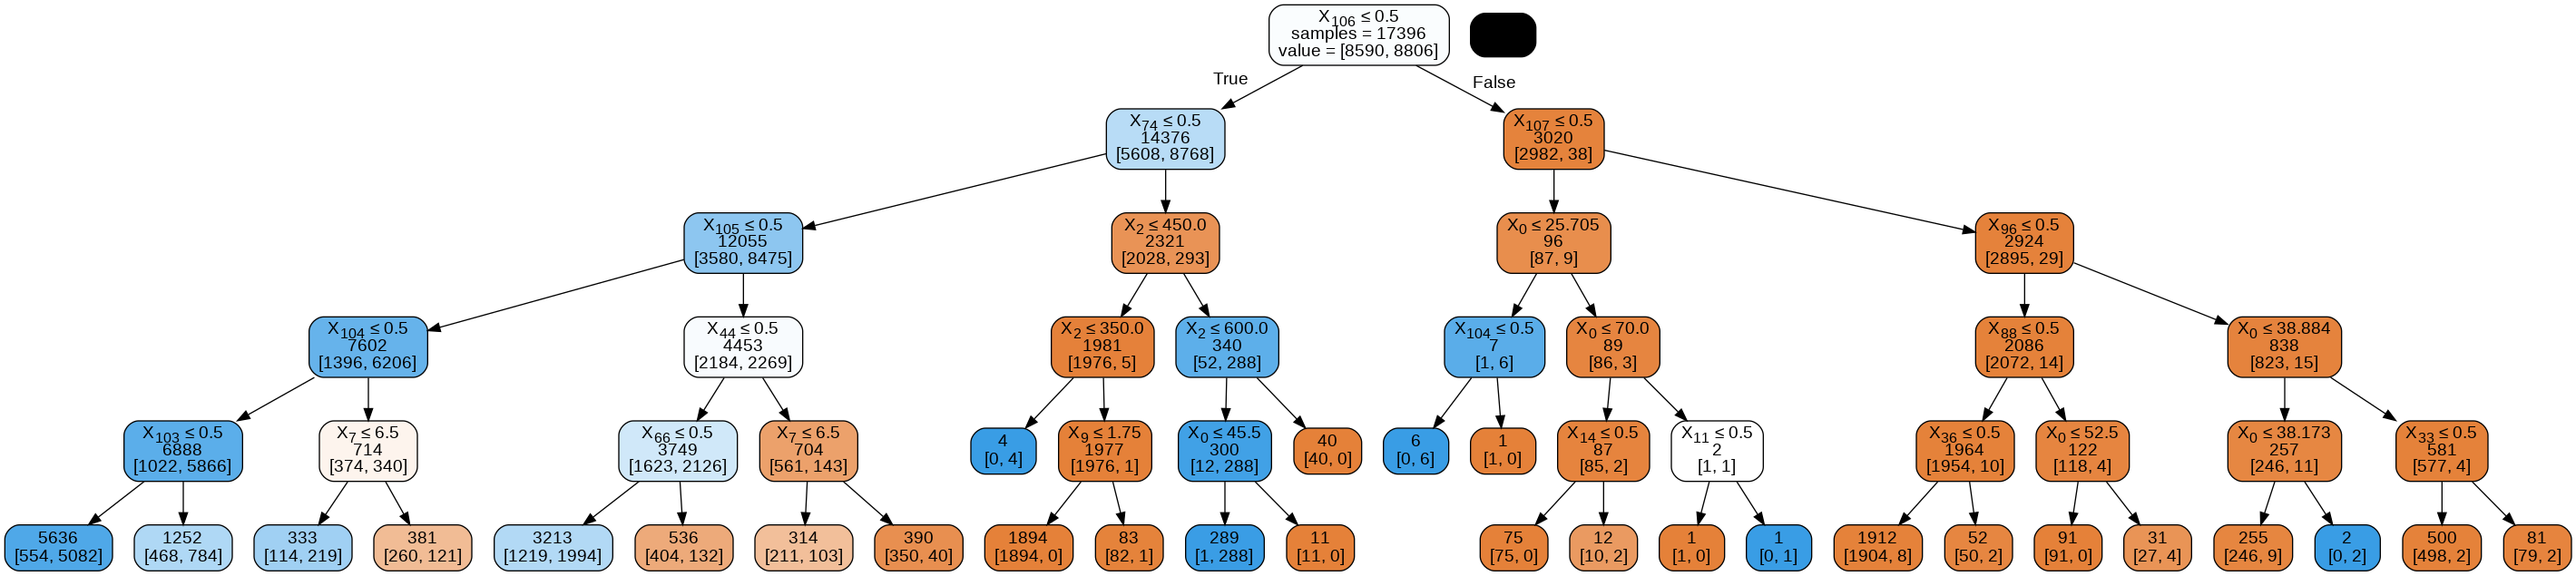

In [ ]:
plotDecisionTree(classtree)

In [ ]:
classificationSummary(y_train,classtree.predict(X_train))

Confusion Matrix (Accuracy 0.8401)

       Prediction
Actual    0    1
     0 6234 2356
     1  426 8380


In [ ]:
classificationSummary(y_valid,classtree.predict(X_valid))

Confusion Matrix (Accuracy 0.8315)

       Prediction
Actual    0    1
     0 4251 1656
     1  298 5393


#Regression Model

**Linear Regression or Full Regression** 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
linearreg = model.fit(X_train,y_train)

In [ ]:
linearreg.intercept_

1.1862408063598073

In [ ]:
linearreg.coef_

array([-1.76244681e-04,  1.40103794e-08,  7.87713634e-05, -3.47252470e-03,
       -9.25086690e-04,  2.43558442e-03, -2.19349157e-03, -1.13213396e-02,
       -4.40531099e-03, -9.82027140e-04,  3.17323333e-03, -8.60950749e-02,
       -8.63833989e-02, -1.41571361e-01, -9.78562926e-02, -1.03020222e-01,
       -1.25250776e-01, -1.24557676e-01, -1.36473439e-01, -1.42970516e-01,
       -1.55757848e-01, -1.85253980e-01, -4.73848897e-02, -6.48242302e-02,
       -5.96459346e-02, -9.59127748e-02, -9.89507044e-02, -1.05991185e-01,
       -9.23890157e-02, -9.63915127e-02, -9.64341161e-02, -1.04794186e-01,
       -8.78124942e-02, -1.65038622e-01, -1.90309714e-01, -5.36389161e-01,
       -1.56130914e-01, -1.51482765e-01, -2.22948150e-01, -3.22480975e-01,
       -1.63985551e-01,  8.37565930e-02, -1.87599731e-01, -2.69872419e-01,
       -1.56173528e-01, -1.06986817e-01, -1.36199967e-01, -1.54276024e-01,
       -1.46523172e-01, -2.10378168e-01, -2.43783429e-02, -6.68121014e-02,
       -5.79973140e-02, -

In [ ]:
train_pred = model.predict(X_train)
train_pred

array([0.40536372, 0.13279681, 0.05315154, ..., 0.1443921 , 0.1548337 ,
       0.17177243])

In [ ]:
regressionSummary(train_pred, y_train)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.2127
            Mean Absolute Error (MAE) : 0.1413
          Mean Percentage Error (MPE) : 35.6489
Mean Absolute Percentage Error (MAPE) : 92.4790


*RMSE for full regression train data is 0.2127*

In [ ]:
train_valid = model.predict(X_valid)
train_valid

array([ 0.46391935,  0.89888384,  0.11491866, ...,  0.68617216,
       -0.03437882,  0.13631855])

In [ ]:
regressionSummary(train_valid, y_valid)


Regression statistics

                      Mean Error (ME) : 0.0041
       Root Mean Squared Error (RMSE) : 0.2109
            Mean Absolute Error (MAE) : 0.1409
          Mean Percentage Error (MPE) : 43.7910
Mean Absolute Percentage Error (MAPE) : 96.7135


*RMSE for full regression valid data is 0.2109*

**Forward Regression**

In [ ]:
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart, adjusted_r2_score, exhaustive_search, backward_elimination, forward_selection, AIC_score, BIC_score


In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)

Forward_model, Forward_variables = forward_selection(X_train.columns, train_model, score_model, verbose=True)

print(Forward_variables)

Variables: Age, VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Month_2, Month_3, Month_4, Month_5, Month_6, Month_7, Month_8, Month_9, Month_10, Month_11, Month_12, WeekOfMonth_2, WeekOfMonth_3, WeekOfMonth_4, WeekOfMonth_5, DayOfWeek_2, DayOfWeek_3, DayOfWeek_4, DayOfWeek_5, DayOfWeek_6, DayOfWeek_7, Make_BMW, Make_Chevrolet, Make_Dodge, Make_Ferrari, Make_Ford, Make_Honda, Make_Jaguar, Make_Lexus, Make_Mazda, Make_Mecedes, Make_Mercury, Make_Nisson, Make_Pontiac, Make_Porche, Make_Saab, Make_Saturn, Make_Toyota, Make_VW, AccidentArea_Urban, DayOfWeekClaimed_2, DayOfWeekClaimed_3, DayOfWeekClaimed_4, DayOfWeekClaimed_5, MonthClaimed_2, MonthClaimed_3, MonthClaimed_4, MonthClaimed_5, MonthClaimed_6, MonthClaimed_7, MonthClaimed_8, MonthClaimed_9, MonthClaimed_10, MonthClaimed_11, MonthClaimed_12, WeekOfMonthClaimed_2, WeekOfMonthClaimed_3, WeekOfMonthClaimed_4, We

In [ ]:
regressionSummary(y_train, Forward_model.predict(X_train[Forward_variables]))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2128
     Mean Absolute Error (MAE) : 0.1414


*RMSE for forward regression train data is 0.2128*

In [ ]:
regressionSummary(y_valid, Forward_model.predict(X_valid[Forward_variables]))


Regression statistics

               Mean Error (ME) : -0.0040
Root Mean Squared Error (RMSE) : 0.2109
     Mean Absolute Error (MAE) : 0.1410


*RMSE for forward regression valid data is 0.2109*

**Backward Regression**

In [ ]:
def train_model1(variables1):
    model1 = LinearRegression()
    model1.fit(X_train[variables1], y_train)
    return model1

def score_model1(model1, variables1):
    return AIC_score(y_train, model1.predict(X_train[variables1]), model1)

backward_model, backward_variables = backward_elimination(X_train.columns, train_model1, score_model1, verbose=True)

print(backward_variables)

Variables: Age, VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Month_2, Month_3, Month_4, Month_5, Month_6, Month_7, Month_8, Month_9, Month_10, Month_11, Month_12, WeekOfMonth_2, WeekOfMonth_3, WeekOfMonth_4, WeekOfMonth_5, DayOfWeek_2, DayOfWeek_3, DayOfWeek_4, DayOfWeek_5, DayOfWeek_6, DayOfWeek_7, Make_BMW, Make_Chevrolet, Make_Dodge, Make_Ferrari, Make_Ford, Make_Honda, Make_Jaguar, Make_Lexus, Make_Mazda, Make_Mecedes, Make_Mercury, Make_Nisson, Make_Pontiac, Make_Porche, Make_Saab, Make_Saturn, Make_Toyota, Make_VW, AccidentArea_Urban, DayOfWeekClaimed_2, DayOfWeekClaimed_3, DayOfWeekClaimed_4, DayOfWeekClaimed_5, MonthClaimed_2, MonthClaimed_3, MonthClaimed_4, MonthClaimed_5, MonthClaimed_6, MonthClaimed_7, MonthClaimed_8, MonthClaimed_9, MonthClaimed_10, MonthClaimed_11, MonthClaimed_12, WeekOfMonthClaimed_2, WeekOfMonthClaimed_3, WeekOfMonthClaimed_4, We

In [ ]:
regressionSummary(y_train, backward_model.predict(X_train[backward_variables]))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.2127
     Mean Absolute Error (MAE) : 0.1414


*RMSE for backward regression train data is 0.2127*

In [ ]:
regressionSummary(y_valid, backward_model.predict(X_valid[backward_variables]))


Regression statistics

               Mean Error (ME) : -0.0041
Root Mean Squared Error (RMSE) : 0.2110
     Mean Absolute Error (MAE) : 0.1410


*RMSE for backward regression valid data is 0.2110*

**Logistic Regresssion**

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [ ]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                             coef
Age                     -0.001241
VehiclePrice             0.000004
Deductible               0.004031
DriverRating            -0.037900
Days_Policy_Accident    -0.031820
...                           ...
Year_1995               -0.462536
Year_1996               -0.669318
BasePolicy_Collision    -0.346343
BasePolicy_Liability    -2.213196
Grouped_Make_Non-Luxury  0.342545

[108 rows x 1 columns]


In [ ]:
logit_reg_prob = logit_reg.predict_proba(X_valid)

In [ ]:
logit_reg_pred = logit_reg.predict(X_valid)

In [ ]:
logit_result = pd.DataFrame({'actual' : y_valid,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
14810,0,0.764277,0.235723,0
26866,1,0.019472,0.980528,1
3713,0,0.919829,0.080171,0
24587,1,0.010242,0.989758,1
12719,0,0.871404,0.128596,0
...,...,...,...,...
19197,1,0.005860,0.994140,1
12024,1,0.868409,0.131591,0
21830,1,0.151459,0.848541,1
3597,0,0.993077,0.006923,0


In [ ]:
classificationSummary(y_train, logit_reg.predict(X_train))

Confusion Matrix (Accuracy 0.9567)

       Prediction
Actual    0    1
     0 8377  213
     1  540 8266


*Accuracy for logistic regression train data is 0.9567*

In [ ]:
classificationSummary(y_valid, logit_reg.predict(X_valid))

Confusion Matrix (Accuracy 0.9589)

       Prediction
Actual    0    1
     0 5762  145
     1  332 5359


*Accuracy for logistic regression valid data is 0.9589*

**Gains Chart**

In [ ]:
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Gains = logit_result.sort_values(by=['p_1'], ascending=False)
Gains

,actual,p_0,p_1,predicted
24501,1,0.000562,0.999438,1
16413,1,0.000659,0.999341,1
26424,1,0.000834,0.999166,1
22406,1,0.000895,0.999105,1
28798,1,0.000967,0.999033,1
...,...,...,...,...
15028,0,0.999835,0.000165,0
35,0,0.999842,0.000158,0
3253,0,0.999844,0.000156,0
8301,0,0.999853,0.000147,0


*The following are the cummulative gains chart and decile lift chart for measuring the effectiveness of the models.* 

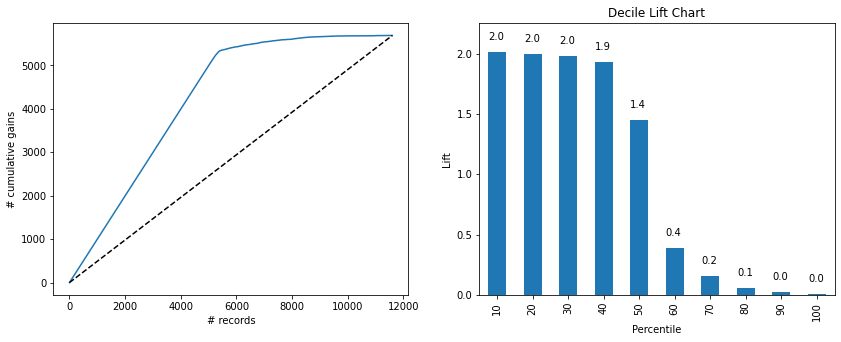

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
gainsChart(Gains.actual,ax=axes[0])
liftChart(Gains['p_1'],ax=axes[1])

**GridSearch Regression Tree and Randomforest**

*Setting the parameters for gridsearch classification*

In [ ]:
param_grid = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' :[0.07,0.05,0.01,0.005],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001]
}

In [ ]:
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs= -1)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.07, 0.05, 0.01, 0.005]})

In [ ]:
gridsearch.best_params_

{'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 0.01}

In [ ]:
gridsearch.best_score_

0.8911815556722932

In [ ]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.001,
                       min_samples_split=0.01, random_state=1)

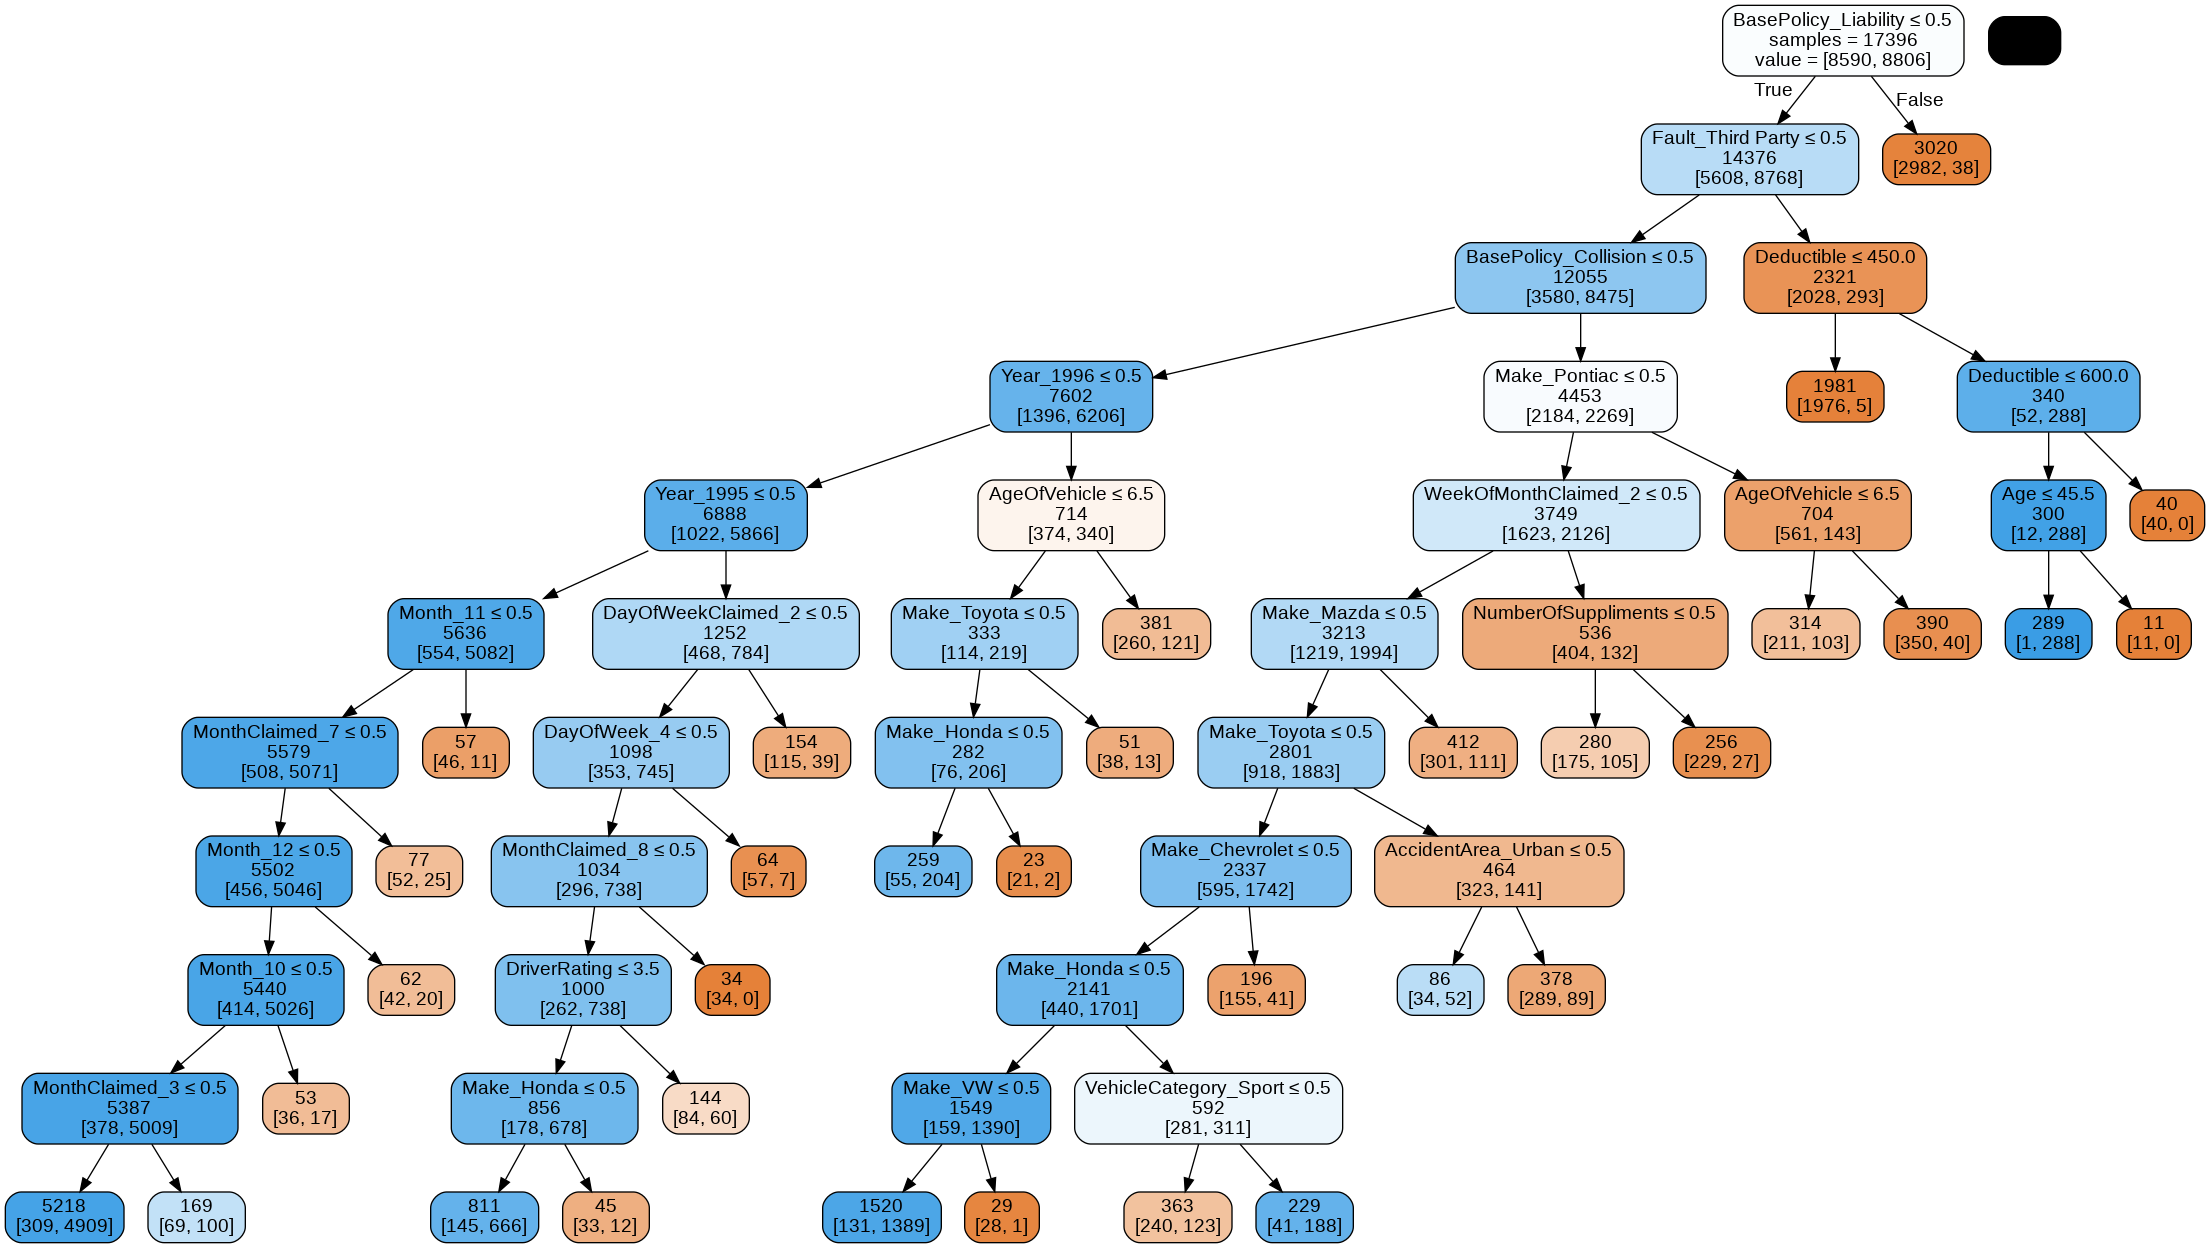

In [ ]:
gridsearchtree = gridsearch.best_estimator_
plotDecisionTree(gridsearchtree, feature_names = X_train.columns)

In [ ]:
regressionSummary(y_train, gridsearchtree.predict(X_train))


Regression statistics

               Mean Error (ME) : 0.0129
Root Mean Squared Error (RMSE) : 0.3212
     Mean Absolute Error (MAE) : 0.1032


*RMSE for gridsearchcv train data is 0.3212, which is quite high as compared to above regression models*

In [ ]:
regressionSummary(y_valid, gridsearchtree.predict(X_valid))


Regression statistics

               Mean Error (ME) : 0.0122
Root Mean Squared Error (RMSE) : 0.3338
     Mean Absolute Error (MAE) : 0.1114


*RMSE for gridsearchcv valid data is 0.3338, which is quite high as compared to above regression models*

In [ ]:
classificationSummary(y_train, gridsearchtree.predict(X_train))

Confusion Matrix (Accuracy 0.8968)

       Prediction
Actual    0    1
     0 7805  785
     1 1010 7796


*Accuracy for gridsearch tree train data is 0.8968* 

In [ ]:
classificationSummary(y_valid, gridsearchtree.predict(X_valid))

Confusion Matrix (Accuracy 0.8886)

       Prediction
Actual    0    1
     0 5332  575
     1  717 4974


*Accuracy for gridsearch tree valid data is 0.8886* 

#Random Forest

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=1, n_estimators=500)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
importance = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis= 0)

**Calculating the importance of each variable for randomforest**

In [ ]:
random_forest_df = pd.DataFrame({"feature" : X_train.columns,
                                 "importance" : importance,
                                 "Std" : std})
print(random_forest_df.sort_values("importance", ascending = False))

                   feature  importance       Std
106   BasePolicy_Liability    0.092662  0.076416
74       Fault_Third Party    0.075269  0.034123
75   VehicleCategory_Sport    0.065134  0.065842
104              Year_1996    0.029089  0.021626
103              Year_1995    0.028923  0.022082
..                     ...         ...       ...
41            Make_Mecedes    0.000025  0.000090
38             Make_Jaguar    0.000014  0.000079
45             Make_Porche    0.000012  0.000067
35            Make_Ferrari    0.000010  0.000071
39              Make_Lexus    0.000008  0.000052

[108 rows x 3 columns]


In [ ]:
classificationSummary(y_train, random_forest.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 8590    0
     1    0 8806


*Accuracy for randomforest train data is 1* 

In [ ]:
classificationSummary(y_valid, random_forest.predict(X_valid))

Confusion Matrix (Accuracy 0.9686)

       Prediction
Actual    0    1
     0 5857   50
     1  314 5377


*Accuracy for randomforest valid data is 0.9686* 

#Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

**Neural Network with 100 hidden layers**

In [ ]:
clf=MLPClassifier(hidden_layer_sizes=100, activation='relu',solver='adam',random_state=1,max_iter=1000)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1)

In [ ]:
classificationSummary(y_train, clf.predict(X_train))

Confusion Matrix (Accuracy 0.9148)

       Prediction
Actual    0    1
     0 7503 1087
     1  395 8411


*The accuracy of train data of Neural Network with 100 hidden layers is 0.9148*

In [ ]:
classificationSummary(y_valid, clf.predict(X_valid))

Confusion Matrix (Accuracy 0.9155)

       Prediction
Actual    0    1
     0 5190  717
     1  263 5428


*The accuracy of valid data of Neural Network with 100 hidden layers is 0.9155*


**Neural Network with 50 hidden layers**

In [ ]:
clf1 = MLPClassifier(hidden_layer_sizes=50,activation='relu',solver='adam',random_state=1,
                    max_iter=1000)
clf1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=50, max_iter=1000, random_state=1)

In [ ]:
classificationSummary(y_train,(clf1.predict(X_train)))

Confusion Matrix (Accuracy 0.9577)

       Prediction
Actual    0    1
     0 8498   92
     1  644 8162


*The accuracy of train data of Neural Network with 50 hidden layers is 0.9577*

In [ ]:
classificationSummary(y_valid, clf1.predict(X_valid))

Confusion Matrix (Accuracy 0.9590)

       Prediction
Actual    0    1
     0 5831   76
     1  399 5292


*The accuracy of valid data of Neural Network with 50 hidden layers is 0.9590*

**Neural Network with 30 hidden layers**

In [ ]:
clf2 = MLPClassifier(hidden_layer_sizes=30,activation='relu',solver='adam',random_state=1,
                    max_iter=1000)
clf2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=30, max_iter=1000, random_state=1)

In [ ]:
classificationSummary(y_train,(clf2.predict(X_train)))

Confusion Matrix (Accuracy 0.9480)

       Prediction
Actual    0    1
     0 8236  354
     1  550 8256


In [ ]:
classificationSummary(y_valid,(clf2.predict(X_valid)))

Confusion Matrix (Accuracy 0.9468)

       Prediction
Actual    0    1
     0 5628  279
     1  338 5353


*Neural Network with 30 hidden layers is the best among all Neural Networks as the false prediction of this Neural Network will cost the company less*

**Modelling with RepNumber, Month, MonthClaimed, Year, DayOfWeekClaimed, DayOfWeek, WeekOfMonth, WeekOfMonthClaimed as categories led to 332 false negative claims in logistic regression model. Thus, We have a better model in the other modelling file named FraudModel with 328 false negatives. Thus, will select that modelling process.**